
# Project: Analysis on TMDB movies Dataset 
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

  The TMDB Movie dataset that will be analyzed in this report which is containing information about  movies from The Movie Database (TMDB). The information includes some basic information about the movie like the id' imdb id popularity budget, revenue original title,cast,homepag,diector,tagline,keywords,overview,runtime''genres''production companie'release_date'vote count', In this report, the data analysis process will be used to answer the following questions:

     1. Top 10 highest revenue movie title

     2 . Which Realase year has the highest average Voting? and also does Voting affect the revenue? what is the correlation bitweenn popularity Vs revenue. Does popularity affect revenue? 
     

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('tmdb-movies.csv')



<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis. 

### General Properties

In [2]:
df.head ()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>  The above experiment shows us first five rows of our dataframe which is Getting ready to clean our dataset

In [3]:
df.shape

(10866, 21)

>The above experiment shows that our dataset has 10866 rows and 21 colum

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>The above experiment shows the whole statistics about our dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> The above result shows that there are missing value 'genres ' , 'tagline ','production_companies ' ' keywords '..

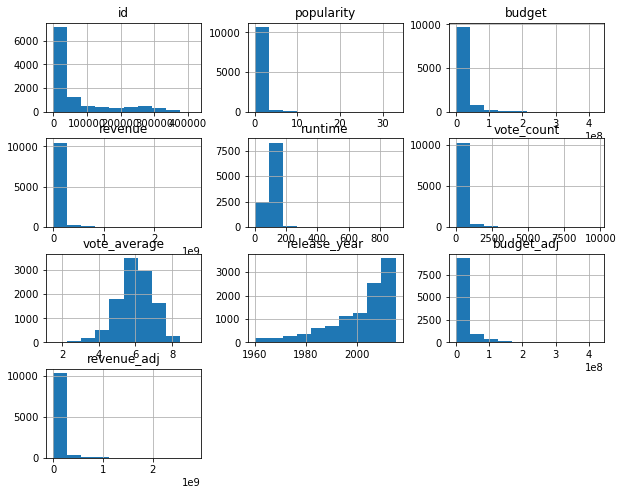

In [6]:
df.hist(figsize=(10,8));

The above result shows the sample of histogram for our dataset

In [7]:
sum(df.duplicated())

1

The above result shows there is one duplicated row which we will fix in the next section.



### Data Cleaning 
  In this section we will trim , fill and drop our dataset to make our dataset better and simple  

In [8]:

list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

The above result shows the columns we have in our dataset and we will drop the unwanted column which we don't use 

In [11]:
columns = ['column', 'column']
def drop_cols():
  df.drop(columns=columns, axis=1, inplace=True)
drop_cols

df.drop(['id', 'imdb_id', 'cast', 'production_companies' , 'homepage'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,director,tagline,keywords,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [ ]:
df.info()

In [ ]:
list(df.columns)

In [13]:
columns = ['column', 'column']
def drop_cols():
  df.drop(columns=columns, axis=1, inplace=True)
drop_cols

df.drop(['genres', 'overview', 'tagline', 'director'], axis = 1, inplace = True)
df.head()

,popularity,budget,revenue,original_title,keywords,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,car race|speed|revenge|suspense|car,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   keywords        9373 non-null   object 
 5   runtime         10866 non-null  int64  
 6   release_date    10866 non-null  object 
 7   vote_count      10866 non-null  int64  
 8   vote_average    10866 non-null  float64
 9   release_year    10866 non-null  int64  
 10  budget_adj      10866 non-null  float64
 11  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1018.8+ KB


> The above result shows that we dropped the unwanted columns perfectly

Here in the above result ,For instance keywords and Movie genre is a string not integer or float. we cannot find the mean of a string. Even if we  convert it to integer and it manages to output any mean for us, it will give  something like "actionactionaction...." That is, if it's possible. we may fill the missing genre data with none otherwise, drop the missing values. Hence i chose to drop it

In [15]:
df.dropna(inplace=True)
df.isnull().sum().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9373 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      9373 non-null   float64
 1   budget          9373 non-null   int64  
 2   revenue         9373 non-null   int64  
 3   original_title  9373 non-null   object 
 4   keywords        9373 non-null   object 
 5   runtime         9373 non-null   int64  
 6   release_date    9373 non-null   object 
 7   vote_count      9373 non-null   int64  
 8   vote_average    9373 non-null   float64
 9   release_year    9373 non-null   int64  
 10  budget_adj      9373 non-null   float64
 11  revenue_adj     9373 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 951.9+ KB


Here we have fixed the missing values 



In [16]:
sum(df.duplicated())

1

In [17]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

The above result shows that the duplicated rows are fixed

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Top 10 highest revenue movie title )

In [18]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'keywords',
       'runtime', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

The above columns helps us to easly select on which columns we are going to work. 
We are gonna work with 'revenue_adj' and original_title

In [19]:
df.nlargest(10,'revenue_adj') ['original_title']

1386                             Avatar
1329                          Star Wars
5231                            Titanic
10594                      The Exorcist
9806                               Jaws
3          Star Wars: The Force Awakens
8889         E.T. the Extra-Terrestrial
8094                            The Net
10110    One Hundred and One Dalmatians
4361                       The Avengers
Name: original_title, dtype: object

In [20]:
top_10=df.nlargest(10,'revenue_adj') [['original_title', 'revenue_adj']].\
set_index('original_title')
top_10




,revenue_adj
original_title,
Avatar,2.827124e+09
Star Wars,2.789712e+09
Titanic,2.506406e+09
The Exorcist,2.167325e+09
Jaws,1.907006e+09
Star Wars: The Force Awakens,1.902723e+09
E.T. the Extra-Terrestrial,1.791694e+09
The Net,1.583050e+09
One Hundred and One Dalmatians,1.574815e+09


The above result vesualize original_title and revenue and used  original_title as index

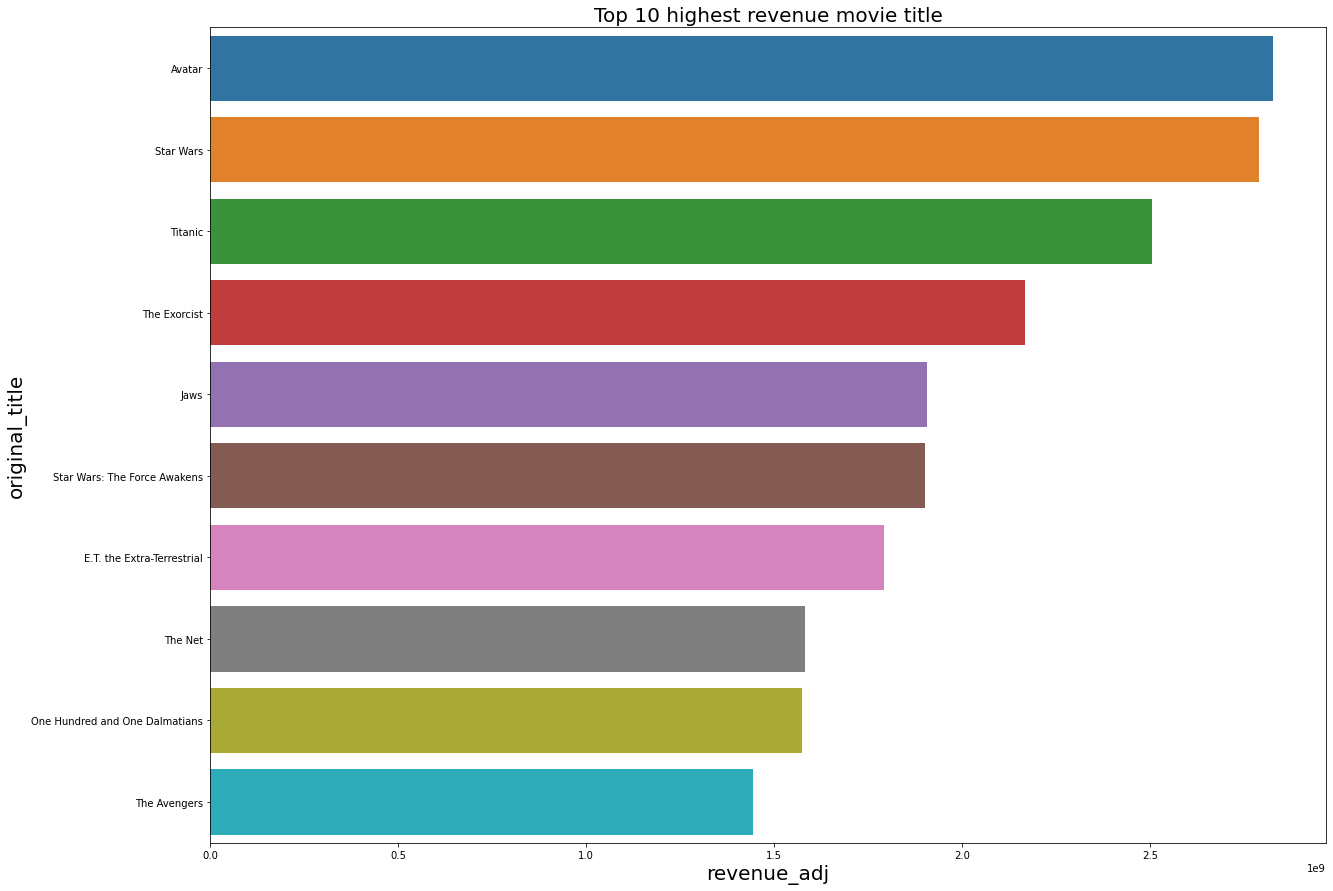

In [21]:
plt.figure(figsize=(20, 15))
sns.barplot(x='revenue_adj',y=top_10.index,data=top_10)
plt.title("Top 10 highest revenue movie title",fontsize=20)
plt.xlabel('revenue_adj',fontsize=20)
plt.ylabel('original_title',fontsize=20)
plt.show()

Here we can see from the graph the top 10 highest revenue movie tiltles based on revenue

### Research Question 2  (Which Realase year has the highest average Voting? and also does Voting affect the revenue?

In [22]:
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'keywords',
       'runtime', 'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

> From the above result we can easily select on which columns we will work .Hence we will work with 'vote_count' and 'release_year'


In [23]:

 df.groupby('release_year')['vote_count'].mean ().sort_values (ascending=False)

release_year
2013    403.874016
2012    401.002247
2015    368.237500
2014    356.488330
2010    330.434555
2011    301.495455
2004    289.863469
2001    288.460829
2003    287.171674
2002    263.523605
2009    261.015625
1999    259.009756
2008    239.155340
2007    234.441489
1997    221.880435
2005    219.750760
2000    219.156098
1995    219.055556
1994    215.947977
2006    204.474114
1998    202.661538
1990    168.148438
1979    160.072727
1992    152.761905
1984    147.941176
1989    147.552000
1975    144.142857
1982    143.746835
1977    143.142857
1972    142.447368
1993    142.205882
1991    141.754237
1980    141.389610
1985    140.729167
1996    136.553191
1987    134.218182
1983    129.078947
1986    119.087719
1974    117.522727
1968    115.972222
1988    109.837209
1976    103.933333
1981     96.934211
1973     94.054545
1971     93.277778
1963     85.000000
1960     81.866667
1961     81.724138
1967     80.894737
1978     78.258065
1962     74.750000
1964     74.690476

From this result we can say  the highest voting is in year 2013 . It is better to visualize it in the nect section

<function matplotlib.pyplot.show(close=None, block=None)>

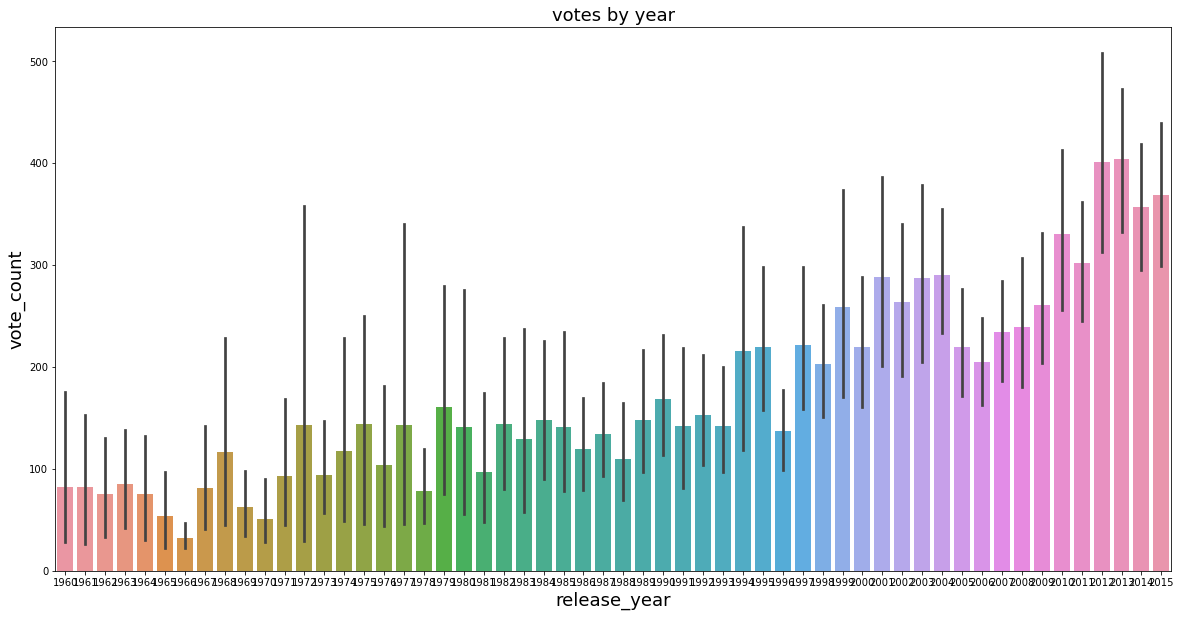

In [24]:
#Draw abarplot using 'release_year'and 'vote_count'
plt.figure(figsize=(20, 10))
sns.barplot(x='release_year',y='vote_count', data=df)
plt.title('votes by year' ,fontsize=18)
plt.xlabel('release_year',fontsize=18)
plt.ylabel('vote_count',fontsize=18)
plt.show


The above graph shows result that can say the highest voting is in year 2013 

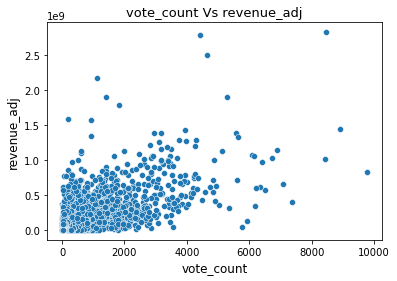

In [25]:

sns.scatterplot (x='vote_count' ,y='revenue_adj',data=df)
plt.title("vote_count Vs revenue_adj",fontsize=13)
plt.xlabel('vote_count',fontsize=12)
plt.ylabel('revenue_adj',fontsize=12)
plt.show ()

the above scatterplot which shows the correlation "vote_count Vs revenue_adj"

In [27]:
df[['vote_count', 'revenue_adj']].corr()

,vote_count,revenue_adj
vote_count,1.000000,0.703642
revenue_adj,0.703642,1.000000


The above scatterplot shows us the correlation bitween revenue and vote and it is 0.70 which means a moderate postive relationship.if the vote increases the revenue also increse.

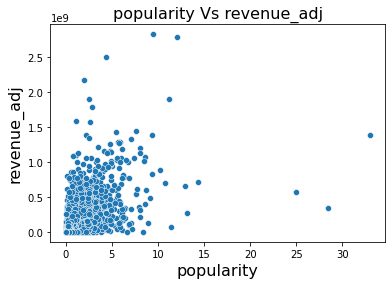

In [28]:

sns.scatterplot (x='popularity' ,y='revenue_adj' ,data=df)
plt.title("popularity Vs revenue_adj",fontsize=16)
plt.xlabel('popularity',fontsize=16)
plt.ylabel('revenue_adj',fontsize=16)
plt.show()

 The above scatterplot which shows the correlation "popularity Vs revenue_adj"

In [29]:
df[['popularity', 'revenue_adj']].corr()

,popularity,revenue_adj
popularity,1.000000,0.603281
revenue_adj,0.603281,1.000000


Scatter plots depict the relations between two continuous features which is popularity Vs revenue_adj.the correlation here is 0.60 which is moderate positive relation  Hence we can say the popularity and  revenue has a positive correlation.If the popularity increase the revenue will inrease as well

<a id='conclusions'></a>
## Conclusions

Based on my analysis i get the following results 

RESULT 

>From my analysis Movies like Star Wars,Titanic,The Exorcist are the highest movies based on their revenue that they made.and also the voting count is changing over the years .Hence  in they year of 2013 has the highest average voting which is 325.471927

>The revenue of movie shows a strong positive correlation with vote count and popularity, which is when the vote and the popularity is increasing and that makes the revenue to get increased as well 

Limitations 

>This dataset is very rich in information. Some limitations the dataset contains are null and zero values in some features. there are so many data that have been cleaned in this report. These datas are seen as inconsistency since they contains NaN and duplicates. Furthermore zero values creates false results during the correlation plots and computing the pearson correlation. Hence data cleaning is a necessary part before moving on to the dataset's investigation.



### Reference

1 https://stackoverflow.com/questions/51174691/how-to-increase-image-size-of-pandas-dataframe-plot

2 https://www.youtube.com/watch?v=FMJhWFLeN7o&list=PL_1pt6K-CLoAD5ZRaVAdvkBHayMwcnUN_

3 https://www.freecodecamp.org/news/python-convert-string-to-int-how-to-cast-a-string-in-python/#:~:text=To%20convert%2C%20or%20cast%2C%20a,int(%22str%22)%20.

4 https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values